# NetworkX Package in Python

### 1. An Intro to NetworkX

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

### 2. Creating Graphs

#### 2.1 Creating Graphs using Built-in Generators

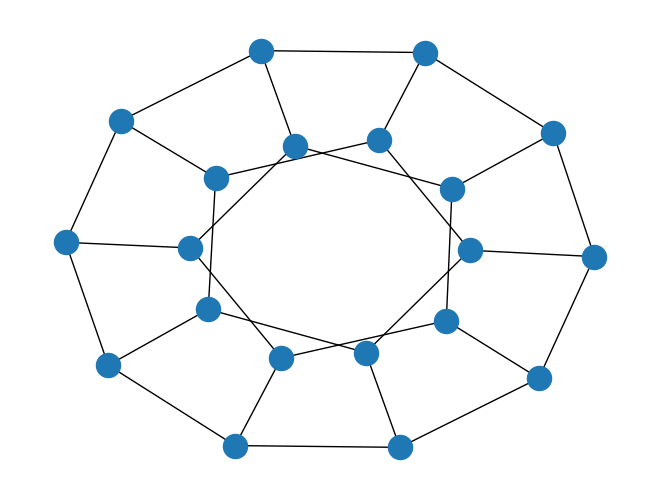

In [10]:
# Dodecahedron graph
G = nx.dodecahedral_graph()
nx.draw(G)

In [11]:
# Checking some common parameters and properties of the graph using a function
def graph_stats(G):
    print("Number of nodes \t= ", G.number_of_nodes())
    print("Number of edges \t= ", G.number_of_edges())
    print("Number of components \t= ", len(list(nx.connected_components(G))))
    print("Is planar \t\t=", nx.is_planar(G))
    print("Is bipartite \t\t=", nx.is_bipartite(G))

In [12]:
#checking the graph stats by calling the function
graph_stats(G)

Number of nodes 	=  20
Number of edges 	=  30
Number of components 	=  1
Is planar 		= True
Is bipartite 		= False


Number of nodes 	=  50
Number of edges 	=  98
Number of components 	=  1
Is planar 		= True
Is bipartite 		= False


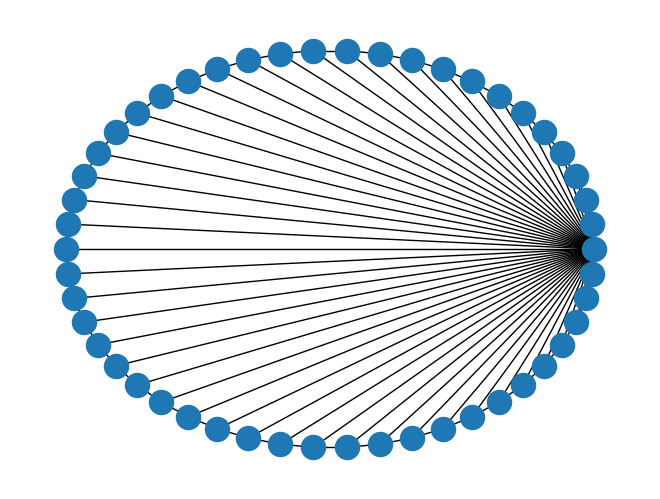

In [13]:
#Writing more builtin function example
G = nx.wheel_graph(50)
graph_stats(G)
nx.draw_circular(G)

#### 2.2 Creating Graphs by Adding Nodes and Edges One By One

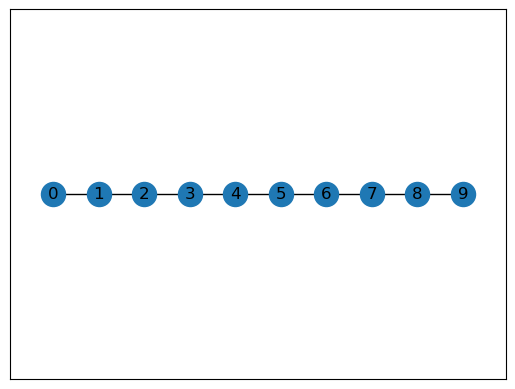

In [14]:
"""
First we are giving the path using a position dictionary to align it and then we are repeating the same using list comprehension.
"""
N = 10
P10 = nx.Graph()
nodes = range(N)
edges = [(n, n+1) for n in range (N-1)]# here we are creating a list of tuples using list comprehension where each tuple is a pair of nodes in the graph and the nodes are connected by an edge. 
positions = {node:(node, 0) for node in nodes}# here we are creating a dictionary using list comprehension where each node is assigned a position in the graph.
P10.add_nodes_from(nodes)
P10.add_edges_from(edges)
nx.draw_networkx(P10, pos=positions, with_labels=True)# here we are drawing the graph using the positions dictionary.

##### Task 1: Create and n x n grid, and draw it like a grid and try it using list comprehension

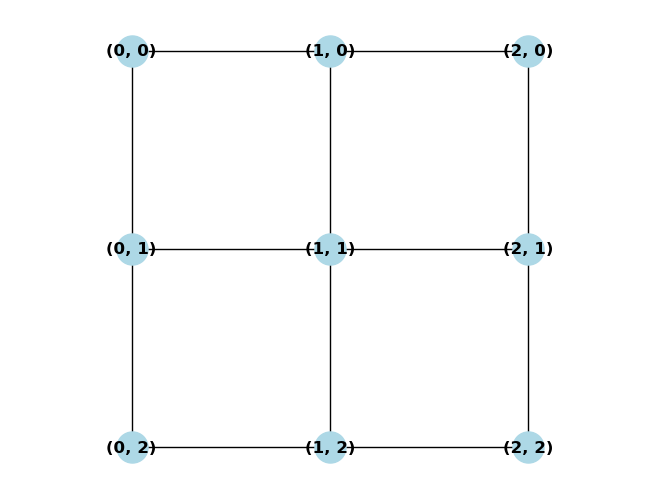

In [15]:
def create_grid_graph(n):
    #Creating an empty graph
    G = nx.Graph()
    
    # Generating nodes as (i, j) tuples using list comprehension
    nodes = [(i, j) for i in range(n) for j in range(n)]
    G.add_nodes_from(nodes)
    
    #Generating horizontal and vertical edgest using the list comprehension
    horizontal_edges = [((i, j), (i+1, j))
                        for i in range(n-1) for j in range(n)]
    vertical_edges = [((i, j), (i, j+1)) for i in range(n) for j in range(n-1)]
    G.add_edges_from(horizontal_edges + vertical_edges)

    return G

def draw_grid_graph(G, n):
    # assigning position to nodes to form a grid layout
    pos  = {(i, j): (i,-j) for i in range(n) for j in range(n)}
    
    # Drawing the graph
    nx.draw(G, pos, with_labels=True, node_size=500,
            node_color='lightblue', font_weight='bold')
    plt.axis('equal')  # Ensuring aspect ratio is square
    plt.show()

# Creating a 3X3 grid graph
n = 3
grid_graph = create_grid_graph(n)
draw_grid_graph(grid_graph, n)
    
    

#### 2.3 Creating Graphs from Pandas Dataframe

In [16]:
#Reading the data from a file of game of thrones
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/8-NetworkX/data/got-edges.csv")
df.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


Number of nodes 	=  107
Number of edges 	=  352
Number of components 	=  1
Is planar 		= False
Is bipartite 		= False


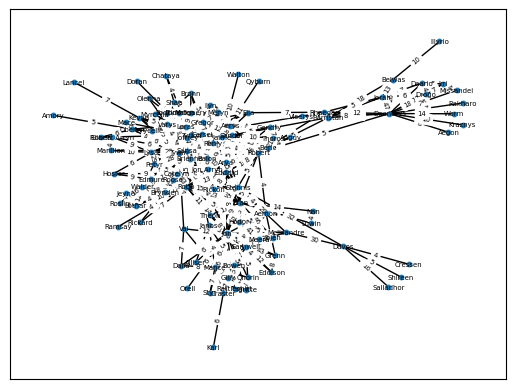

In [17]:
GoT = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight')
pos = nx.spring_layout(GoT)
nx.draw_networkx(GoT, pos=pos, node_size=10, font_size=5)
weights = nx.get_edge_attributes(GoT, 'Weight')
nx.draw_networkx_edge_labels(GoT, pos, weights, font_size=5)
graph_stats(GoT)

### 3. Checking Basic Parameters (nodes, edges, degree,...)

In [19]:
# storing the degrees in the pandas dataframe sorted by degree
degree_dict = dict(GoT.degree())
dfGoT = pd.DataFrame(data = degree_dict.items(), columns = ['Name', 'Degree'])
dfGoT.sort_values('Degree', ascending=False, inplace=True)

#### Task-2: Plot a histogram of degrees and extract degrees from DataFrame

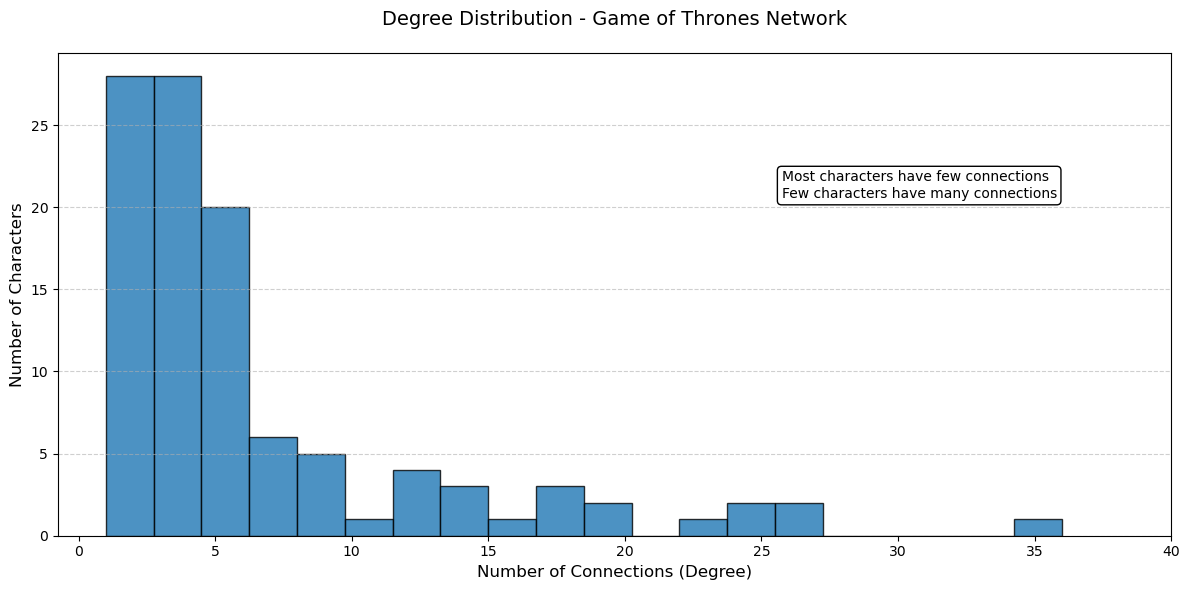

In [21]:
degrees = dfGoT['Degree']
#confudring plot
plt.figure(figsize=(12, 6))
plt.hist(degrees,
         bins=20,
         color='#1f77b4',
         edgecolor='black',
         alpha=0.8)

# Add labels and formatting
plt.title('Degree Distribution - Game of Thrones Network', fontsize=14, pad=20)
plt.xlabel('Number of Connections (Degree)', fontsize=12)
plt.ylabel('Number of Characters', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Custom x-axis ticks
max_degree = degrees.max()
plt.xticks(range(0, max_degree+5, 5))

# Add annotation for insight
plt.annotate('Most characters have few connections\nFew characters have many connections',
             xy=(0.65, 0.7),
             xycoords='axes fraction',
             fontsize=10,
             bbox=dict(boxstyle="round", fc="white"))

plt.tight_layout() # Adjust the plot to ensure everything fits without overlapping
plt.show()

### 4. Finding "important" nodes

1. Degree Centrality
2. Closeness Centrality
3. Betweenness Centrality
4. Pagerank

#### Degree Centrality

Degree Centrality of a node is the fraction of nodes it is connected to
$$ dc(v) = \frac{degree(v)}{n-1} $$


In [22]:
# Calculate the Degree Centrality of each node and add it to the dgGoT dataframe
DegCent = nx.degree_centrality(GoT)
dfGoT['DegCent'] = dfGoT['Name'].map(DegCent)
dfGoT.sort_values('Degree', ascending=False)

,Name,Degree,DegCent
6,Tyrion,36,0.339623
50,Sansa,26,0.245283
21,Jon,26,0.245283
48,Robb,25,0.235849
4,Jaime,24,0.226415
...,...,...,...
104,Shireen,1,0.009434
105,Doran,1,0.009434
66,Kraznys,1,0.009434
10,Amory,1,0.009434


##### Task-3:  Calculate the Degree Centrality of each node without using the builtin function and compare the results.

In [25]:
#Manually calculating the degree centrality without using the builtin function

#Getting all nodes from source and target columns
all_nodes = pd.concat([df['Source'], df['Target']])# here we are concatenating the source and target columns to get all the nodes in the graph

#Counting occurences of each node
manual_degree = all_nodes.value_counts().to_dict()# here we are counting the occurences of each node in the graph and converting it to a dictionary

#Getting the total number of nodes
n = len(manual_degree) # here we are getting the total number of nodes in the graph
# Calculate manual degree centrality
manual_deg_cent = {node: degree/(n-1)
                   for node, degree in manual_degree.items()}# here we are calculating the degree centrality of each node in the graph

# Adding the manual degree centrality to the dataframe
dfGoT['Manual_DegCent'] = dfGoT['Name'].map(manual_deg_cent)

#selecting the relevant columns and displaying its first 10 rows
comparison_df = dfGoT[['Name', 'DegCent', 'Manual_DegCent']].head(10)

#Checking if the manual calculation matches the builtin function
are_equal = np.allclose(dfGoT['DegCent'], dfGoT['Manual_DegCent'], atol=1e-10)

print(f"Manual calculation matches NetworkX: {are_equal}")
comparison_df

Manual calculation matches NetworkX: True


,Name,DegCent,Manual_DegCent
6,Tyrion,0.339623,0.339623
21,Jon,0.245283,0.245283
50,Sansa,0.245283,0.245283
48,Robb,0.235849,0.235849
4,Jaime,0.226415,0.226415
7,Tywin,0.207547,0.207547
17,Cersei,0.188679,0.188679
12,Arya,0.179245,0.179245
42,Catelyn,0.169811,0.169811
5,Robert,0.169811,0.169811


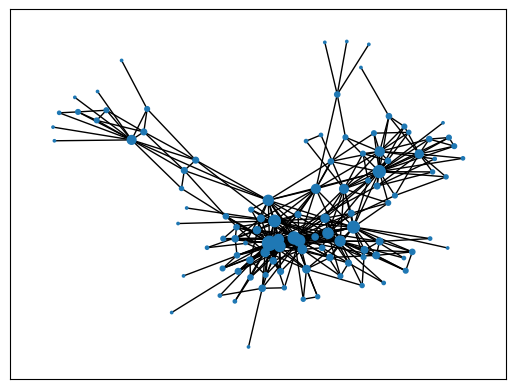

In [26]:
# Plot the graph with node sizes proportional to their degree centrality

node_sizes = [value*300 for key, value in DegCent.items()]
nx.draw_networkx(GoT, with_labels=False, node_size=node_sizes)

#### 2.  Closeness Centrality 

*Closeness Centrality*  $cc(v)$ of a node $v$ is the (normalised) reciprocal of the average distance to all other nodes

$$ cc(v) = \frac{n-1}{\sum_{u \in V(G)}d(v,u)} $$


In [27]:
# Calculate the Closeness Centrality of each node and add it to the dgGoT dataframe

CloseCent = nx.closeness_centrality(GoT)
dfGoT['CloseCent'] = dfGoT['Name'].map(CloseCent)
dfGoT.sort_values('CloseCent', ascending=False)

,Name,Degree,DegCent,Manual_DegCent,CloseCent
6,Tyrion,36,0.339623,0.339623,0.512077
50,Sansa,26,0.245283,0.245283,0.509615
5,Robert,18,0.169811,0.169811,0.500000
48,Robb,25,0.235849,0.235849,0.488479
12,Arya,19,0.179245,0.179245,0.486239
...,...,...,...,...,...
104,Shireen,1,0.009434,0.009434,0.250000
73,Cressen,1,0.009434,0.009434,0.250000
74,Salladhor,1,0.009434,0.009434,0.250000
59,Karl,1,0.009434,0.009434,0.250000


In [28]:
# Closeness centrality of other graphs we created
CloseCentP10 = nx.closeness_centrality(P10)

##### Task-4: Calculate the Closeness Centrality of each node without using the builtin function and compare the results

In [29]:
manual_close_cent = {}
components = list(nx.connected_components(GoT))

for component in components:
    subG = GoT.subgraph(component)
    k = len(component)

    if k == 1:
        # Isolated node gets centrality 0
        for node in component:
            manual_close_cent[node] = 0.0
    else:
        # Calculating shortest paths within the component
        for node in component:
            # Getting shortest path lengths to all reachable nodes
            path_lengths = nx.single_source_shortest_path_length(subG, node)

            # Sum of distances (already excludes unreachable nodes)
            sum_dist = sum(path_lengths.values())

            # Avoiding division by zero
            if sum_dist == 0:
                cc = 0.0
            else:
                # NetworkX's formula: (component_size-1)/sum_distances
                cc = (k - 1) / sum_dist

            manual_close_cent[node] = cc

# Adding to DataFrame to compare
dfGoT['Manual_CloseCent'] = dfGoT['Name'].map(manual_close_cent)

# Numerical comparison accounting for floating point precision
are_equal = np.allclose(
    dfGoT['CloseCent'], dfGoT['Manual_CloseCent'], atol=1e-10)

print(f"Manual calculation matches NetworkX: {are_equal}")
dfGoT[['Name', 'CloseCent', 'Manual_CloseCent']].sort_values(
    'CloseCent', ascending=False).head(10)

Manual calculation matches NetworkX: True


,Name,CloseCent,Manual_CloseCent
6,Tyrion,0.512077,0.512077
50,Sansa,0.509615,0.509615
5,Robert,0.500000,0.500000
48,Robb,0.488479,0.488479
12,Arya,0.486239,0.486239
4,Jaime,0.479638,0.479638
21,Jon,0.479638,0.479638
51,Stannis,0.479638,0.479638
7,Tywin,0.469027,0.469027
75,Eddard,0.460870,0.460870


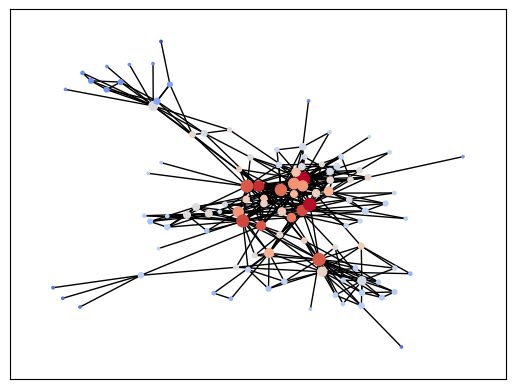

In [30]:
# Indicate the closeness centrality of the node by node color
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# Use plt.cm.coolwarm() to convert a 0-to-1 value to color

cl = list(CloseCent.values())
cln = [(c - min(cl))/(max(cl) - min(cl)) for c in cl]
clist = [plt.cm.coolwarm(x) for x in cln]

nx.draw_networkx(GoT, with_labels=False,
                 node_color=clist, node_size=node_sizes)